In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
observations=1000
xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(-10,10,(observations,1))

generated_inputs=np.column_stack((xs,zs))
noise=np.random.uniform(-1,1,(observations,1))

generated_targets=2*xs+3*zs+5+noise
np.savez('Tf_intro',inputs=generated_inputs,targets=generated_targets)
training_data=np.load('Tf_intro.npz')

In [22]:
input_size=2
output_size=1

In [24]:
model=tf.keras.Sequential([tf.keras.layers.Dense(output_size)])
model.compile(optimizer='sgd',loss='mean_squared_error')
model.fit(training_data['inputs'],training_data['targets'],epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 792us/step - loss: 42.9852
Epoch 2/100
32/32 [==============================] - 0s 728us/step - loss: 6.3966
Epoch 3/100
32/32 [==============================] - 0s 740us/step - loss: 1.9011
Epoch 4/100
32/32 [==============================] - 0s 859us/step - loss: 0.8192
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4991
Epoch 6/100
32/32 [==============================] - 0s 769us/step - loss: 0.3757
Epoch 7/100
32/32 [==============================] - 0s 828us/step - loss: 0.3394
Epoch 8/100
32/32 [==============================] - 0s 885us/step - loss: 0.3409
Epoch 9/100
32/32 [==============================] - 0s 777us/step - loss: 0.3346
Epoch 10/100
32/32 [==============================] - 0s 892us/step - loss: 0.3627
Epoch 11/100
32/32 [==============================] - 0s 989us/step - loss: 0.3435
Epoch 12/100
32/32 [==============================] - 0s 879us/step - loss: 0.3512
Epoch 13/100
3

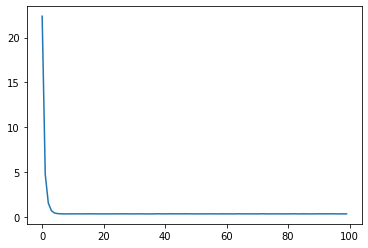

In [25]:
loss_df=pd.DataFrame(model.history.history)
plt.plot(loss_df)

In [27]:
model.layers[0].get_weights()[0]

array([[1.9889121],
       [2.9563572]], dtype=float32)

In [28]:
model.layers[0].get_weights()[1]

array([5.0017376], dtype=float32)

In [31]:
prediction=model.predict_on_batch(training_data['inputs'])

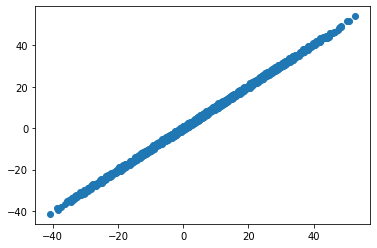

In [34]:
plt.scatter(prediction,training_data['targets'])